In [1]:
import pandas as pd
import numpy as np
import os

from scipy import stats

In [2]:
cwd = os.getcwd()

# data_path = "F:\\Academic\\Research\\myData\\processed_dataset"

data_path = "D:\\Research\\data\\processed_dataset" #lab

# tissue_type = 'liver'
# tissue_type = 'pancreas'
# tissue_type = 'kidney'
# tissue_type = 'heart'
# tissue_type = 'brain_myeloid'
tissue_type = 'marrow'


df_mRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\mRNA_bulk.csv')
df_mRNA = df_mRNA.drop('Unnamed: 0',axis=1)

df_miRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\miRNA_bulk.csv')
df_miRNA = df_miRNA.drop('Unnamed: 0',axis=1)

df_miRNA

,gene_name,A22.D042044.3_9_M.1.1,C5.D042044.3_9_M.1.1,D10.D042044.3_9_M.1.1,E13.D042044.3_9_M.1.1,F19.D042044.3_9_M.1.1,H2.D042044.3_9_M.1.1,I9.D042044.3_9_M.1.1,J14.D042044.3_9_M.1.1,K17.D042044.3_9_M.1.1,...,P13.MAA001888.3_39_F.1.1,P14.MAA001888.3_39_F.1.1,P15.MAA001888.3_39_F.1.1,P16.MAA001888.3_39_F.1.1,P17.MAA001888.3_39_F.1.1,P18.MAA001888.3_39_F.1.1,P19.MAA001888.3_39_F.1.1,P20.MAA001888.3_39_F.1.1,P21.MAA001888.3_39_F.1.1,P22.MAA001888.3_39_F.1.1
0,Mir103-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mir103-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mir106b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mir107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mir10a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Mirlet7d,0,0,0,0,0,22,29,0,0,...,0,0,0,0,0,0,0,0,0,0
234,Mirlet7f-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,Mirlet7f-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,Mirlet7g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
temp_allgenes = df_mRNA.drop(df_mRNA.index[(df_mRNA.iloc[:,1:].sum(axis = 1) < 100)])
temp_allgenes = temp_allgenes.set_index('gene_name').T

temp_allgenes

gene_name,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
A22.D042044.3_9_M.1.1,0,0,0,0,0,0,0,103,178,0,...,0,0,0,0,0,0,0,0,0,0
C5.D042044.3_9_M.1.1,0,112,0,0,0,58,0,0,389,0,...,0,0,0,0,0,0,15,144,0,80
D10.D042044.3_9_M.1.1,0,185,0,0,0,0,0,0,0,0,...,167,0,0,1,0,0,1,0,0,129
E13.D042044.3_9_M.1.1,0,54,0,0,0,0,0,0,1,0,...,0,0,0,0,0,57,45,0,0,0
F19.D042044.3_9_M.1.1,0,0,0,0,0,255,0,0,530,0,...,0,0,0,0,262,0,26,0,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P18.MAA001888.3_39_F.1.1,0,13,0,0,0,0,0,0,0,0,...,43,0,0,0,0,0,0,0,0,0
P19.MAA001888.3_39_F.1.1,0,0,0,0,0,0,0,0,31,0,...,0,0,0,0,0,0,0,0,0,0
P20.MAA001888.3_39_F.1.1,0,14,0,0,0,0,0,0,0,0,...,1,0,0,0,0,45,0,0,0,0
P21.MAA001888.3_39_F.1.1,0,50,0,0,29,0,0,1,11,0,...,0,0,0,12,0,0,0,0,0,36


In [4]:
corr_tally = pd.DataFrame(columns=['tally'])

for col in temp_allgenes:
    corr_tally.loc[col] = [0]

In [5]:
temp_mir = df_miRNA.drop(df_miRNA.index[(df_miRNA.iloc[:,1:].sum(axis = 1) < 90)])
temp_mir = temp_mir.set_index('gene_name').T

# corr_df = pd.DataFrame()

all_corr = []


corr_thres = 0.3
# miCol = 3
# temp_mir.iloc[:,miCol]

for miCol in range(temp_mir.shape[1]):
    for col in temp_allgenes:
        r, p = stats.pearsonr(temp_mir.iloc[:,miCol], temp_allgenes[col])
        
        all_corr.append(r)

        if(r>corr_thres):
            corr_tally.loc[col] = corr_tally.loc[col] + 1

        # corr_df.iloc[col, miCol] = round(r, 3)

# corr_df[(corr_df.r>0.3)]

In [6]:
high_corr_genes = corr_tally.sort_values('tally', ascending=False)[0:2500]

In [7]:
# r, p = stats.pearsonr(temp_mir126, temp_allgenes.iloc[:,1])


corr_tally[corr_tally.tally>0]


,tally
0610007P14Rik,1
0610009D07Rik,1
0610009O20Rik,1
0610010K14Rik,1
1110001J03Rik,1
...,...
Zfp953,1
Zfp964,1
Zfyve28,1
Zfyve9,1


In [8]:
high_corr_genes.sort_index().index

Index(['0610007P14Rik', '0610009D07Rik', '0610009O20Rik', '0610010K14Rik',
       '1110001J03Rik', '1110002B05Rik', '1110003E01Rik', '1110004F10Rik',
       '1110019D14Rik', '1200009I06Rik',
       ...
       'Zfp715', 'Zfp750', 'Zfp771', 'Zfp786', 'Zfp937', 'Zfp953', 'Zfp964',
       'Zfyve28', 'Zfyve9', 'Zpbp'],
      dtype='object', length=2500)

In [9]:
final_mRNA_gene_dataset = temp_allgenes[high_corr_genes.sort_index().index]
final_mRNA_gene_dataset.to_csv(f'{data_path}\\{tissue_type}\\highly_expressed_2500_genes.csv')



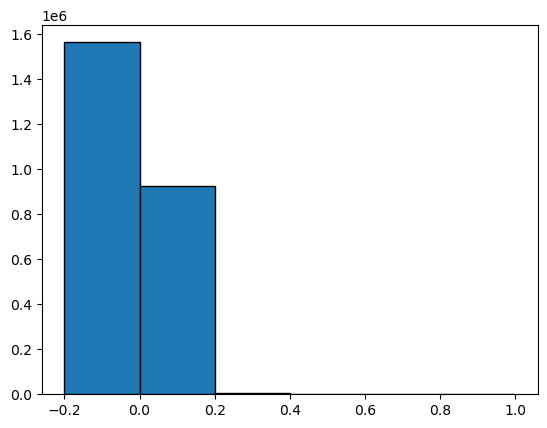

In [26]:
# temp_mir126 = df_miRNA.set_index('gene_name').T
# temp_mir126 = temp_mir126.Mir126



all_corr


import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd


bins= [-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
plt.hist(all_corr, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [27]:
# corr_df = pd.DataFrame(columns=['r', 'p'])

# for col in temp_allgenes:
#     r, p = stats.pearsonr(temp_mir126, temp_allgenes[col])
#     corr_df.loc[col] = [round(r, 3), round(p, 3)]

In [28]:
high_corr_genes

,tally
Tex12,3
D7Ertd143e,3
Cdk3-ps,3
Sap25,3
6230409E13Rik,3
...,...
Proca1,0
Ptgfrn,0
Procr,0
Ptgfr,0


In [29]:
# corr_df[(corr_df.p>0.3)]